# ProDS Associate (입문) 샘플문항 풀이
- 문제 출처 https://certi.multicampus.com/ie/intro/sampleTest?p_menu=MTMxMDkjTUFJTg==&p_gubun=Qw==

- 글로벌 유통 회사에서 매출액을 증대시킬 수 있는 마케팅 방법을 찾기 위하여, 채널별 반응과 매출금액과의 관계를 분석하고자 한다.

In [1]:
import numpy as np
import pandas as pd

## 데이터 로드 및 확인

In [2]:
df = pd.read_csv("01_ADS_sample_1.csv")
df

,YEAR_MONTH,SOCIAL,TV,NEWSPAPER,SALES_AMT
0,2005-Dec,84.72,19.20,48.96,14.28
1,2006-Jan,351.48,33.96,51.84,11.52
2,2006-Feb,135.48,20.88,46.32,20.88
3,2006-Mar,116.64,1.80,36.00,11.40
4,2006-Apr,318.72,24.00,0.36,15.36
...,...,...,...,...,...
164,2019-Aug,200.16,50.40,4.32,9.12
165,2019-Sep,179.64,42.72,7.20,11.64
166,2019-Oct,45.84,4.44,16.56,15.36
167,2019-Nov,113.04,5.88,9.72,30.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR_MONTH  169 non-null    object 
 1   SOCIAL      169 non-null    float64
 2   TV          169 non-null    float64
 3   NEWSPAPER   169 non-null    float64
 4   SALES_AMT   169 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.7+ KB


In [4]:
df.describe()

,SOCIAL,TV,NEWSPAPER,SALES_AMT
count,169.000000,169.000000,169.000000,169.000000
mean,176.466036,27.639763,35.125207,16.896568
std,101.987883,17.884260,24.743385,6.307183
min,0.840000,0.000000,0.360000,1.920000
25%,90.600000,11.880000,14.280000,12.480000
50%,179.640000,26.760000,31.080000,15.480000
75%,261.240000,43.560000,50.160000,20.760000
max,355.680000,59.520000,121.080000,32.400000


## 1. 상관분석

- (ADS_sample_1.csv를 활용하여) 년월(YEAR_MONTH) 변수를 제외한 변수들에 대해 상관분석을 수행하고자 한다. 매출금액(SALES_AMT)과 상관 정도가 가장 강한(상관계수 절대값이 가장 큰) 변수를 찾고 해당 변수와 매출금액(SALES_AMT)과의 상관계수 값을 기술하시오. (배점 5점)

- ※ 참고사항
    - 피어슨(Pearson) 상관계수 값을 구하시오
    - 상관계수는 절대값을 취하지 않은 상관계수 값 그대로, 소수점 넷째 자리에서 반올림하여 셋째 자리까지 기술하시오. (답안예시 : 0.123)

In [5]:
cor = df.drop("YEAR_MONTH", axis=1).corr()["SALES_AMT"]
cor

SOCIAL       0.037020
TV          -0.183192
NEWSPAPER    0.002282
SALES_AMT    1.000000
Name: SALES_AMT, dtype: float64

In [6]:
ans1 = cor["TV"]
round(ans1, 3)

-0.183

## 2. 증감률 계산

- (ADS_sample_1.csv를 활용하여) 2009년 매출금액(SALES_AMT) 대비 2019년 매출금액(SALES_AMT)의 변화 정도를 확인하고자 한다. 다음 수식을 이용하여 증감률(%)을 기술하시오. (배점 : 10점)

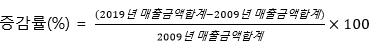

- ※ 참고사항
    - 연도는 년월(YEAR_MONTH) 변수로부터 추출하며, 연도별 매출금액합계는 1월부터 12월까지의 매출 총액을 의미한다.
    - 증감률(%)은 소수점 넷째 자리에서 반올림하여 셋째 자리까지 기술하시오. (답안예시 : 1.234)

In [7]:
sales_2009 = df.loc[df["YEAR_MONTH"].str.startswith("2009"), "SALES_AMT"]
sales_2019 = df.loc[df["YEAR_MONTH"].str.startswith("2019"), "SALES_AMT"]

In [8]:
sales_2009_sum = sales_2009.sum()
sales_2019_sum = sales_2019.sum()
ans2 = (sales_2019_sum - sales_2009_sum) / sales_2009_sum * 100
round(ans2, 3)

0.194

## 3. 통계분석

- (ADS_sample_1.csv를 활용하여) 2009년과 2019년의 매출금액(SALES_AMT) 평균이 통계적으로 유의한 차이가 있는지 검정하고자 한다. 적절한 검정 수행 후, 유의 확률(P-value)의 값을 기술하시오.
- 단, 검정 시 세운 대립 가설(H₁)은 다음과 같다.
    - 대립 가설(H₁): 2009년과 2019년의 매출금액의 평균이 같지 않다

- ※ 참고사항
    - 등분산 가정 하에서 검정을 수행한다.
    - 2009년 매출금액(SALES_AMT) 12건과 2019년 매출금액(SALES_AMT) 12건에 대한 평균 검정으로, 해당 검정의 검정통계량은 자유도가 22인 t 분포를 따른다
    - 유의 확률(P-value)값은 소수점 넷째 자리에서 반올림하여 셋째 자리까지 기술하시오. (답안예시 : 0.123)

In [9]:
from scipy import stats

In [10]:
ttest = stats.ttest_ind(sales_2009, sales_2019)
ttest

Ttest_indResult(statistic=-0.011021647568416792, pvalue=0.9913055138582367)

In [11]:
ans3 = ttest.pvalue
round(ans3, 3)

0.991